## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



boston = datasets.load_boston()
x = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['MEDV'])

In [2]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [4]:
x.shape

(506, 13)

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [5]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state=100)

In [20]:
arv1 = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10)

arv1.fit(x_treino, y_treino)

r_2=arv1.score(x_treino, y_treino)
round(r_2,2)

0.85

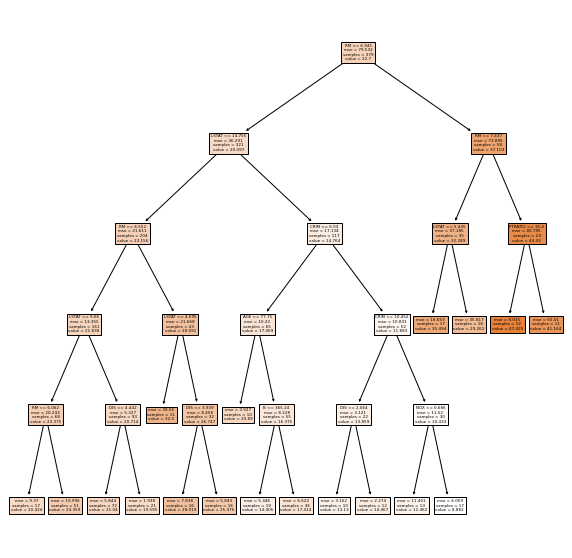

In [21]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(arv1, feature_names=x.columns,filled=True) 

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [22]:
path = arv1.cost_complexity_pruning_path(x_treino, y_treino)
path

{'ccp_alphas': array([0.00000000e+00, 2.57137603e-02, 8.95754873e-02, 1.36583938e-01,
        2.49000505e-01, 2.97023310e-01, 3.93019986e-01, 4.55211340e-01,
        5.20985178e-01, 5.93669502e-01, 5.96033223e-01, 7.33877451e-01,
        8.96209074e-01, 2.05043891e+00, 3.50086486e+00, 5.39882635e+00,
        1.38159243e+01, 3.74862353e+01]),
 'impurities': array([12.29297104, 12.31868481, 12.40826029, 12.54484423, 12.79384474,
        13.09086805, 13.48388803, 13.93909937, 14.46008455, 15.05375405,
        15.64978727, 16.38366473, 17.2798738 , 19.33031271, 22.83117756,
        28.23000391, 42.0459282 , 79.53216352])}

Text(0, 0.5, 'Impureza total das folhas')

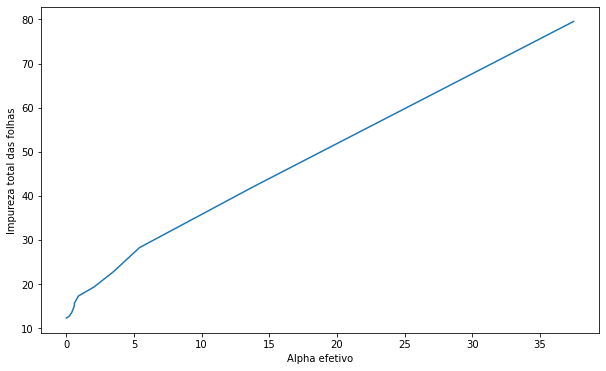

In [23]:
ccp_alphas, impurezas = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurezas)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [24]:
arvores = [] # lista de árvores, inicialmente vazia

for ccp_a in ccp_alphas:
#sendo ccp_alphas = [0.00000000e+00, 2.57137603e-02, 8.95754873e-02, 1.36583938e-01,
#2.49000505e-01, 2.97023310e-01, 3.93019986e-01, 4.55211340e-01,
#5.20985178e-01, 5.93669502e-01, 5.96033223e-01, 7.33877451e-01,
#8.96209074e-01, 2.05043891e+00, 3.50086486e+00, 5.39882635e+00,
#1.38159243e+01, 3.74862353e+01]"""
    clf = DecisionTreeRegressor(random_state=100, ccp_alpha=ccp_a)
    clf.fit(x_treino,y_treino)
    arvores.append(clf)

In [25]:
arvores

[DecisionTreeRegressor(random_state=100),
 DecisionTreeRegressor(ccp_alpha=0.025713760294238136, random_state=100),
 DecisionTreeRegressor(ccp_alpha=0.08957548734338694, random_state=100),
 DecisionTreeRegressor(ccp_alpha=0.1365839379947893, random_state=100),
 DecisionTreeRegressor(ccp_alpha=0.24900050541832797, random_state=100),
 DecisionTreeRegressor(ccp_alpha=0.29702330975356217, random_state=100),
 DecisionTreeRegressor(ccp_alpha=0.39301998573104724, random_state=100),
 DecisionTreeRegressor(ccp_alpha=0.45521134011113795, random_state=100),
 DecisionTreeRegressor(ccp_alpha=0.5209851777122383, random_state=100),
 DecisionTreeRegressor(ccp_alpha=0.5936695016008258, random_state=100),
 DecisionTreeRegressor(ccp_alpha=0.5960332231389458, random_state=100),
 DecisionTreeRegressor(ccp_alpha=0.7338774512682518, random_state=100),
 DecisionTreeRegressor(ccp_alpha=0.8962090739549282, random_state=100),
 DecisionTreeRegressor(ccp_alpha=2.05043890805755, random_state=100),
 DecisionTreeRegr

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [26]:
#treino_score = [mean_squared_error(y_treino , arvore.predict(x_treino)) for arvore in arvores]

treino = []
for arvore in arvores:
    y_chapeu = arvore.predict(x_treino)
    t = mean_squared_error(y_treino,y_chapeu)
    treino.append(t)








In [27]:
#teste_scores  = [mean_squared_error(y_test  , arvore.predict(X_test )) for arvore in arvores]
teste = []
for arvore in arvores:
    y_chapeu = arvore.predict(x_teste)
    t = mean_squared_error(y_teste,y_chapeu)
    teste.append(t)

In [28]:
len(treino)

18

In [29]:
len(arvores)

18

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

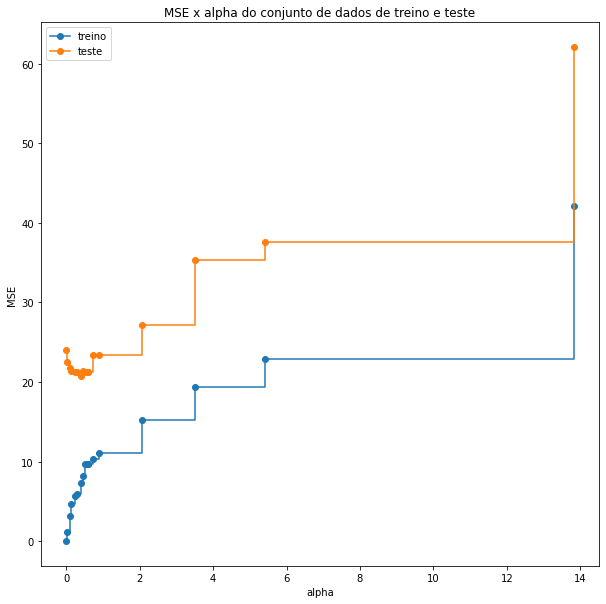

In [30]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], treino[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], teste[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()


In [31]:
# melhor valor é entre 1 e 2 do alpha

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [33]:
arv1_post_prunning = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, ccp_alpha=1.5)

arv1_post_prunning.fit(x_treino, y_treino)



DecisionTreeRegressor(ccp_alpha=1.5, max_depth=5, min_samples_leaf=10)

In [35]:
r_2=arv1_post_prunning.score(x_treino, y_treino)
round(r_2,2)

0.78

In [36]:
r_2_teste=arv1_post_prunning.score(x_teste, y_teste)
round(r_2_teste,2)

0.66

### 7. Visualize esta árvore.

[Text(329.72727272727275, 475.65000000000003, 'RM <= 6.945\nmse = 79.532\nsamples = 379\nvalue = 22.7'),
 Text(202.9090909090909, 339.75, 'LSTAT <= 14.755\nmse = 36.291\nsamples = 321\nvalue = 20.097'),
 Text(101.45454545454545, 203.85000000000002, 'RM <= 6.552\nmse = 21.611\nsamples = 204\nvalue = 23.156'),
 Text(50.72727272727273, 67.94999999999999, 'mse = 13.355\nsamples = 161\nvalue = 21.838'),
 Text(152.1818181818182, 67.94999999999999, 'mse = 21.668\nsamples = 43\nvalue = 28.091'),
 Text(304.3636363636364, 203.85000000000002, 'CRIM <= 6.03\nmse = 17.134\nsamples = 117\nvalue = 14.764'),
 Text(253.63636363636363, 67.94999999999999, 'mse = 10.22\nsamples = 65\nvalue = 17.069'),
 Text(355.09090909090907, 67.94999999999999, 'mse = 10.831\nsamples = 52\nvalue = 11.883'),
 Text(456.54545454545456, 339.75, 'RM <= 7.437\nmse = 73.895\nsamples = 58\nvalue = 37.103'),
 Text(405.8181818181818, 203.85000000000002, 'mse = 37.185\nsamples = 35\nvalue = 32.289'),
 Text(507.27272727272725, 203.8

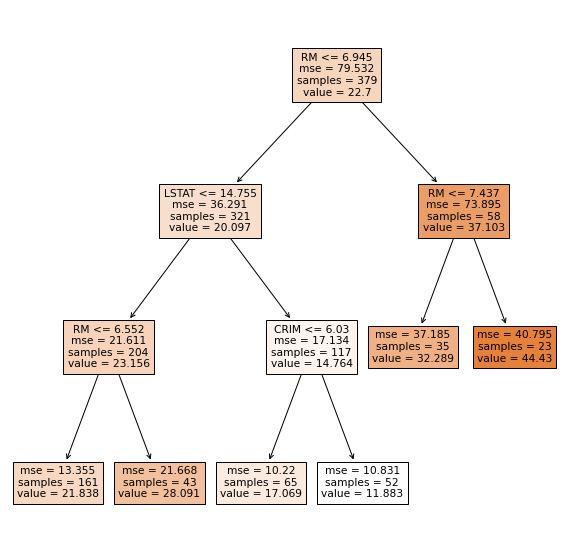

In [37]:
plt.rc('figure', figsize=(10, 10))
tree.plot_tree(arv1_post_prunning, feature_names= x.columns, filled=True)